In [155]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

# TensorFlow and tf.keras
import tensorflow as tf
tf.random.set_seed(1)

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn") # pretty matplotlib plots

In [60]:
world_model_input = pd.read_csv('world_model_input.csv')
world_model_output = pd.read_csv('world_model_output.csv')

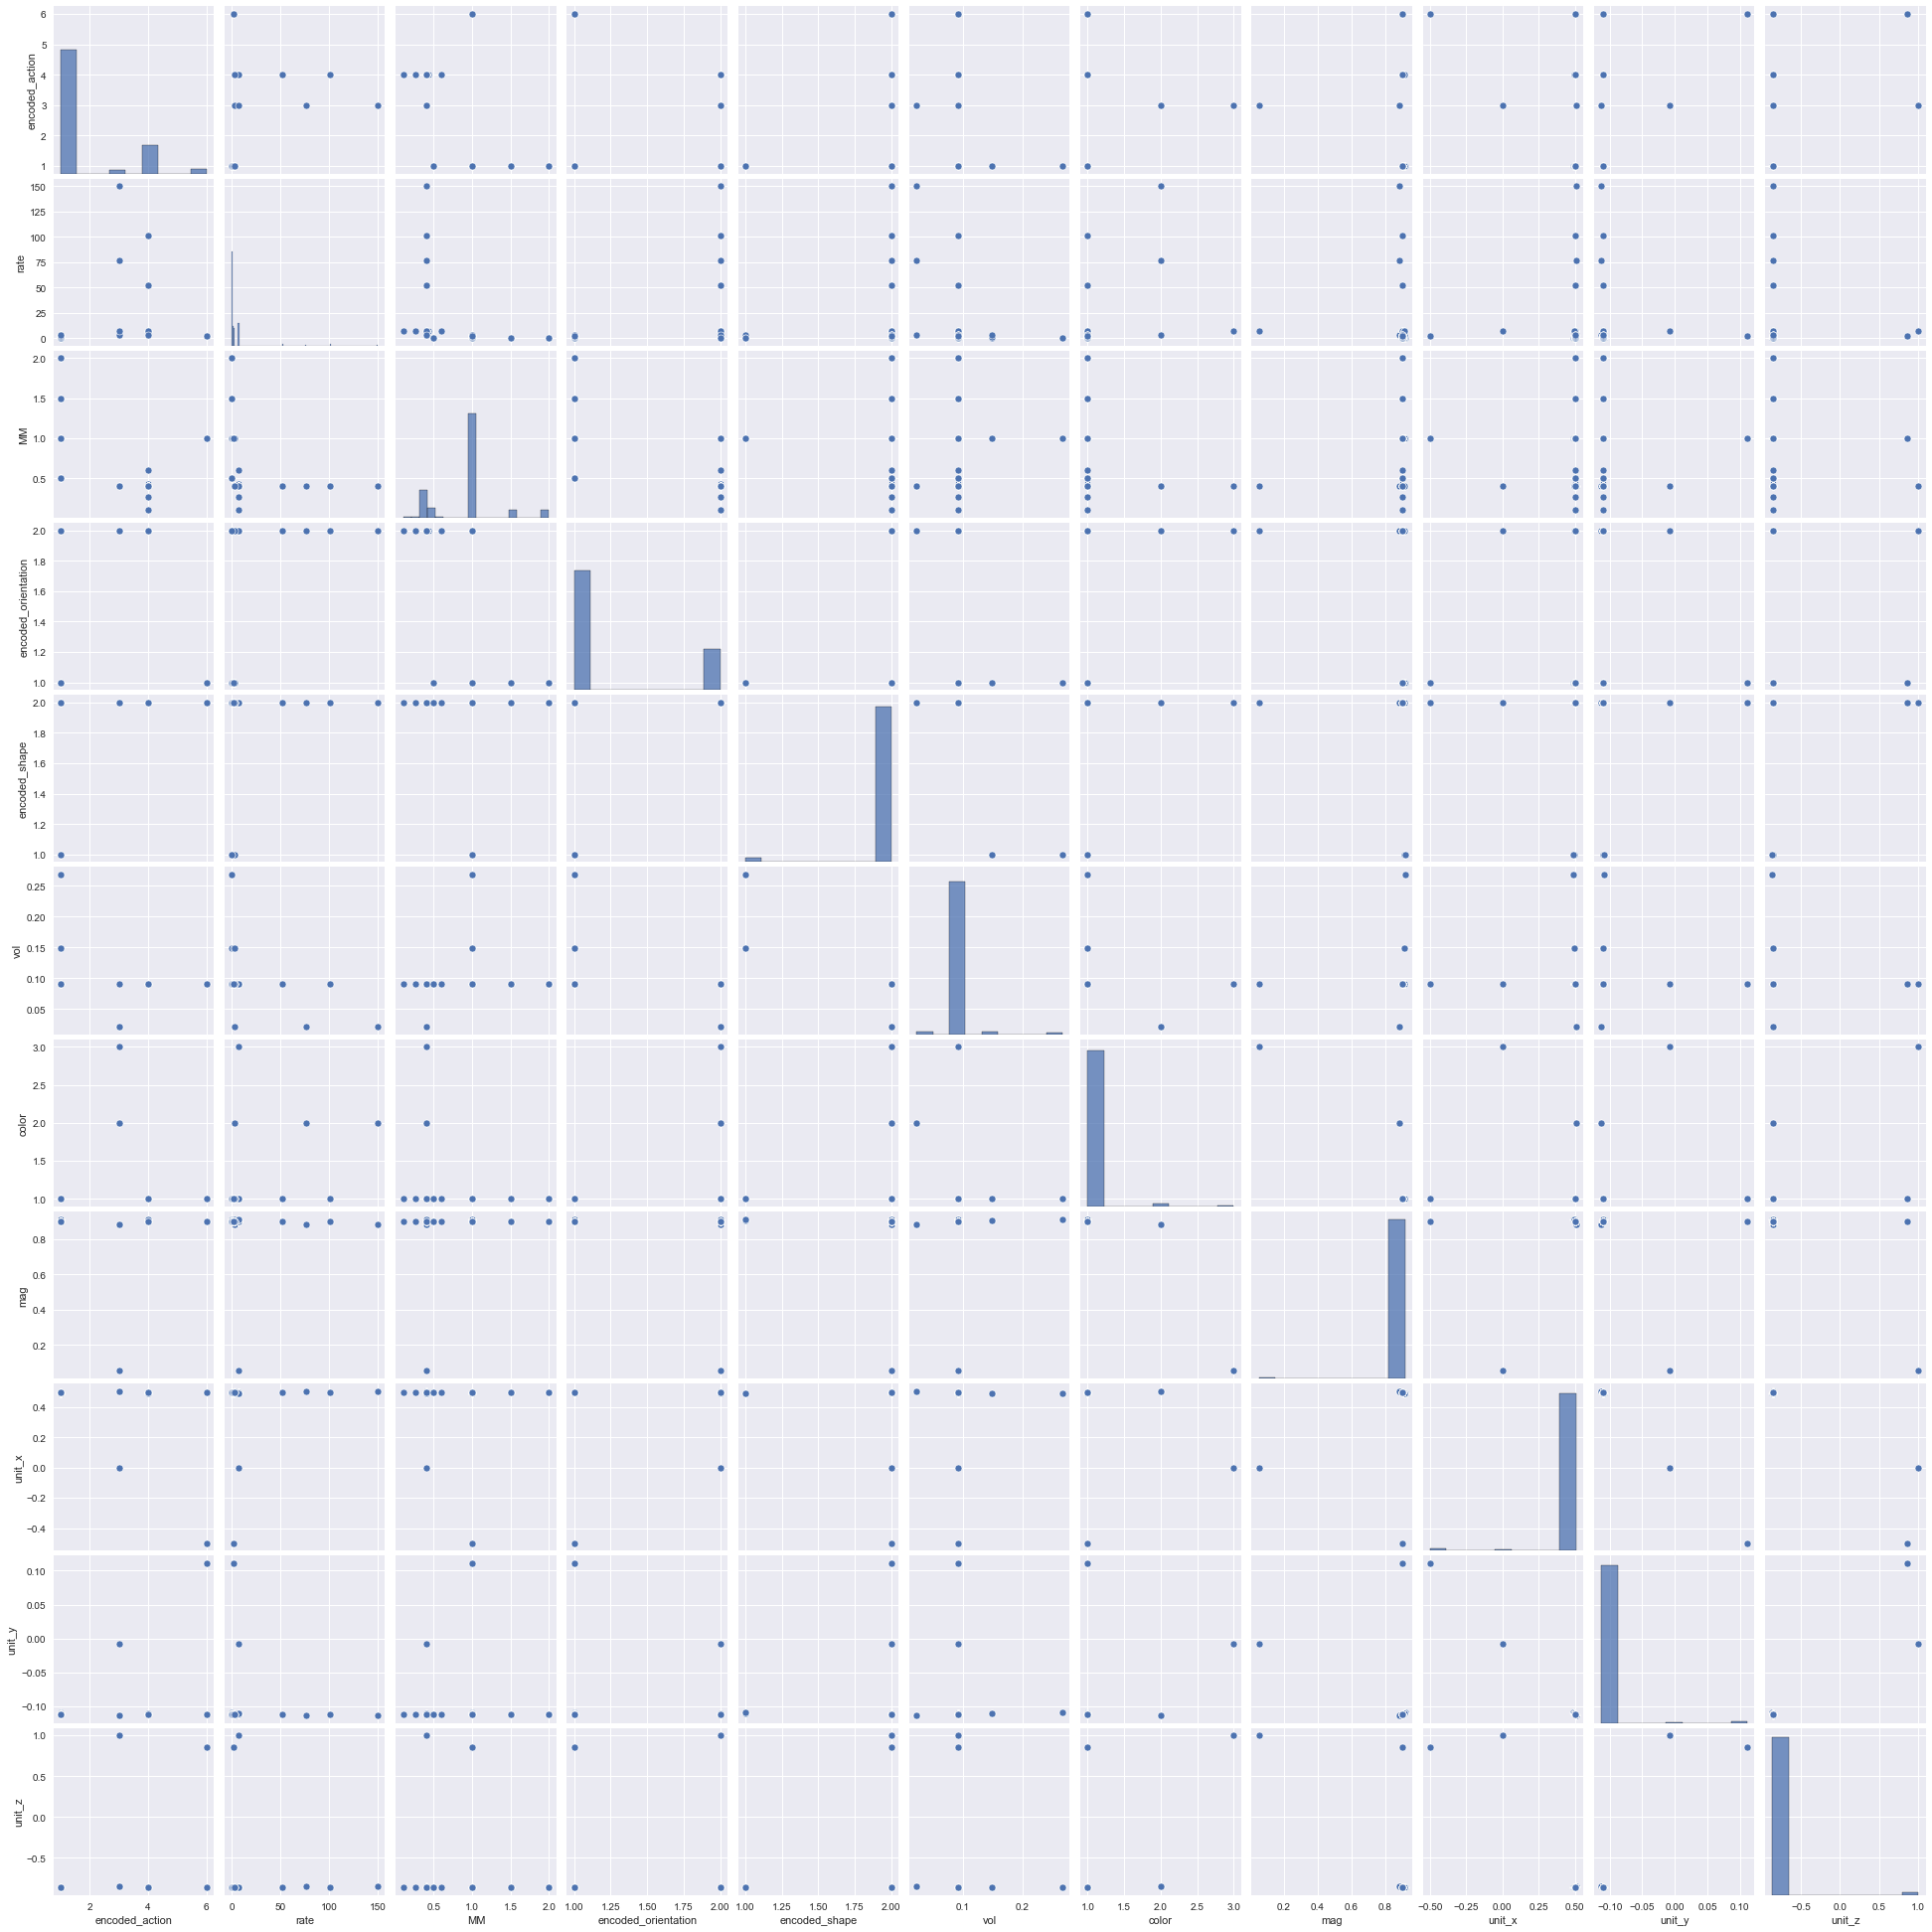

In [78]:
sns.pairplot(world_model_input)

In [61]:
x = MaxAbsScaler().fit_transform(world_model_input)
y = world_model_output

In [62]:
model = MLPRegressor(random_state=1, max_iter=1000)
cv_results = cross_validate(model, x, y, cv=5, scoring=('r2','neg_mean_squared_error'), return_train_score=True)

In [63]:
cv_results

{'fit_time': array([0.02959681, 0.02003503, 0.01935267, 0.02624083, 0.01920605]),
 'score_time': array([0.00353932, 0.00363183, 0.00366521, 0.00382614, 0.00394177]),
 'test_r2': array([ -85.96554368, -130.62218723,  -19.88206619,  -11.79610039,
         -45.83585923]),
 'train_r2': array([-282.52646261,  -80.58939134, -156.14820481, -161.74579702,
        -151.71481752]),
 'test_neg_mean_squared_error': array([-0.01096205, -0.00927153, -0.00826872, -0.00775257, -0.01049051]),
 'train_neg_mean_squared_error': array([-0.008703  , -0.00873033, -0.00892222, -0.00888381, -0.00870866])}

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [161]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(11,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid'),
])

In [162]:
model.compile(optimizer='adam',loss='mse')

In [163]:
history = model.fit(x_train, y_train, validation_split=0.3, batch_size=64, epochs=30, verbose=0)

In [164]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
25,0.000360,0.000234,25
26,0.000314,0.000204,26
27,0.000284,0.000181,27
28,0.000258,0.000164,28
29,0.000241,0.000150,29


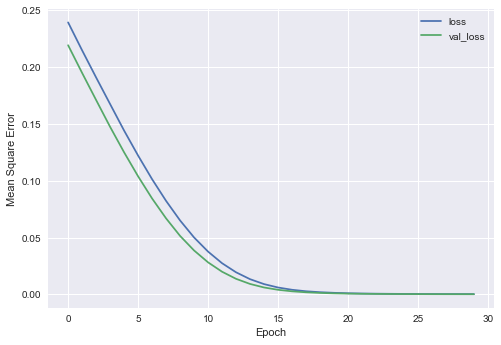

In [165]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.legend()
plt.grid(True)
plt.show()

In [166]:
mean_squared_error(y_test, model.predict(x_test))

0.00024037467401181903